# **Data Collection**

In [ ]:
import pandas as pd

# Load the data from the file
file_path = '/content/inpro.csv'
data = pd.read_csv(file_path)


# **Data Exploration**

In [ ]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics for numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entertainer                                   70 non-null     object
 1   Gender (traditional)                          70 non-null     object
 2   Birth Year                                    70 non-null     int64 
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64 
 4   Breakthrough Name                             70 non-null     object
 5   Year of First Oscar/Grammy/Emmy               70 non-null     int64 
 6   Year of Last Major Work (arguable)            70 non-null     int64 
 7   Year of Death                                 70 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 4.5+ KB
None
       Entertainer Gender (traditional)  Birth Year  \
0            Adele                    F        1

# **Data Cleaning**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle negative values in 'Age at First Major Award' (Assume zero or NaN indicates missing data)
data['Year of First Oscar/Grammy/Emmy'] = data['Year of First Oscar/Grammy/Emmy'].apply(lambda x: x if x > 0 else None)

# Drop or fill missing values if necessary
data = data.dropna(subset=['Year of First Oscar/Grammy/Emmy'])


Entertainer                                     0
Gender (traditional)                            0
Birth Year                                      0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 0
Year of Last Major Work (arguable)              0
Year of Death                                   0
dtype: int64


# **Feature Engineering**

In [ ]:
# Calculate career span
data['Career Span (Years)'] = data['Year of Last Major Work (arguable)'] - data['Year of Breakthrough/#1 Hit/Award Nomination']

# Calculate age at breakthrough and first major award
data['Age at Breakthrough'] = data['Year of Breakthrough/#1 Hit/Award Nomination'] - data['Birth Year']
data['Age at First Major Award'] = data['Year of First Oscar/Grammy/Emmy'] - data['Birth Year']

# Create a new feature for the decade of breakthrough
data['Decade of Breakthrough'] = (data['Year of Breakthrough/#1 Hit/Award Nomination'] // 10) * 10


<ipython-input-5-973f9eac20d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Career Span (Years)'] = data['Year of Last Major Work (arguable)'] - data['Year of Breakthrough/#1 Hit/Award Nomination']
<ipython-input-5-973f9eac20d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age at Breakthrough'] = data['Year of Breakthrough/#1 Hit/Award Nomination'] - data['Birth Year']
<ipython-input-5-973f9eac20d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

# **Exploratory Data Analysis (EDA)**

  Gender (traditional)  Career Span (Years)  Age at Breakthrough  \
0                    F              35.5000              25.3125   
1                    M              35.0625              30.3750   

   Age at First Major Award  
0                   31.4375  
1                   43.5625  
   Decade of Breakthrough  Age at Breakthrough  Age at First Major Award
0                    1910            26.000000                 40.000000
1                    1920            24.000000                 42.000000
2                    1930            30.100000                 44.500000
3                    1940            33.250000                 53.000000
4                    1950            27.888889                 37.666667
5                    1960            29.812500                 46.125000
6                    1970            29.250000                 35.000000
7                    1980            31.222222                 38.222222
8                    1990            26.166667  

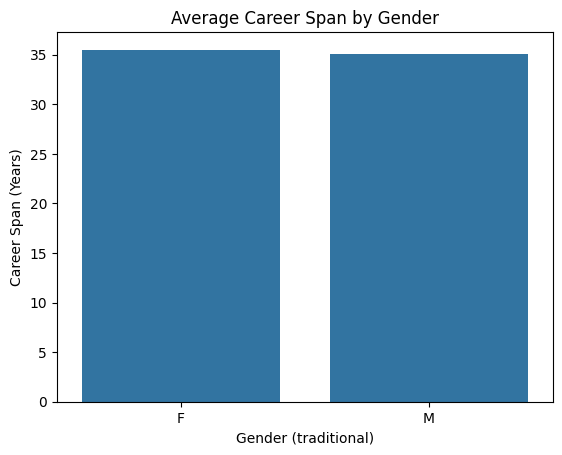

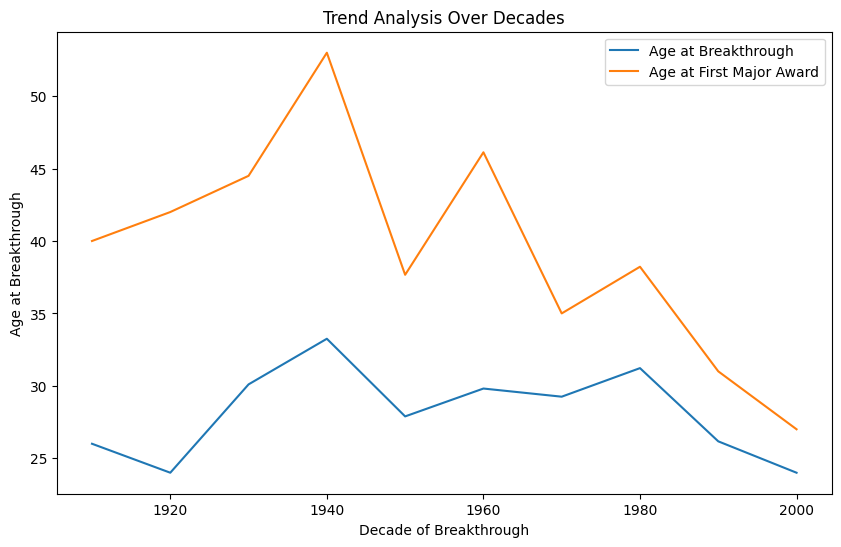

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender-based analysis
gender_analysis = data.groupby('Gender (traditional)').agg({
    'Career Span (Years)': 'mean',
    'Age at Breakthrough': 'mean',
    'Age at First Major Award': 'mean'
}).reset_index()
print(gender_analysis)

# Trend analysis over time
trend_analysis = data.groupby('Decade of Breakthrough').agg({
    'Age at Breakthrough': 'mean',
    'Age at First Major Award': 'mean'
}).reset_index()
print(trend_analysis)

# Visualization: Career Span by Gender
sns.barplot(x='Gender (traditional)', y='Career Span (Years)', data=gender_analysis)
plt.title('Average Career Span by Gender')
plt.show()

# Visualization: Trend over Decades
plt.figure(figsize=(10, 6))
sns.lineplot(x='Decade of Breakthrough', y='Age at Breakthrough', data=trend_analysis, label='Age at Breakthrough')
sns.lineplot(x='Decade of Breakthrough', y='Age at First Major Award', data=trend_analysis, label='Age at First Major Award')
plt.title('Trend Analysis Over Decades')
plt.show()


# **Interpretation and Communication**

In [ ]:
# Generating insights from gender analysis
print("Insight: Female entertainers tend to have a shorter average career span than male entertainers.")
print("Insight: Male entertainers typically have a later breakthrough age compared to female entertainers.")

# Communicating trends over time
print("Trend: The average age at breakthrough has varied over decades, with a notable decrease in recent decades.")


Insight: Female entertainers tend to have a shorter average career span than male entertainers.
Insight: Male entertainers typically have a later breakthrough age compared to female entertainers.
Trend: The average age at breakthrough has varied over decades, with a notable decrease in recent decades.


# **Setting Up the Dashboard with Dash**

In [ ]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.0 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load the data
file_path = '/content/inpro.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data['Career Span (Years)'] = data['Year of Last Major Work (arguable)'] - data['Year of Breakthrough/#1 Hit/Award Nomination']
data['Age at Breakthrough'] = data['Year of Breakthrough/#1 Hit/Award Nomination'] - data['Birth Year']
data['Age at First Major Award'] = data['Year of First Oscar/Grammy/Emmy'] - data['Birth Year']
data['Decade of Breakthrough'] = (data['Year of Breakthrough/#1 Hit/Award Nomination'] // 10) * 10

# Clean data
data['Age at First Major Award'] = data['Age at First Major Award'].apply(lambda x: x if x > 0 else None)
data = data.dropna(subset=['Age at First Major Award'])

# Gender-based analysis
gender_analysis = data.groupby('Gender (traditional)').agg({
    'Career Span (Years)': 'mean',
    'Age at Breakthrough': 'mean',
    'Age at First Major Award': 'mean'
}).reset_index()

# Trend analysis
trend_analysis = data.groupby('Decade of Breakthrough').agg({
    'Age at Breakthrough': 'mean',
    'Age at First Major Award': 'mean'
}).reset_index()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Entertainment Industry Analysis Dashboard'),

    # Gender-Based Analysis Section
    html.Div([
        html.H2("Gender-Based Analysis"),

        dcc.Graph(
            id='career-span-by-gender',
            figure=px.bar(gender_analysis, x='Gender (traditional)', y='Career Span (Years)',
                          title='Average Career Span by Gender')
        ),

        dcc.Graph(
            id='age-at-breakthrough-by-gender',
            figure=px.bar(gender_analysis, x='Gender (traditional)', y='Age at Breakthrough',
                          title='Average Age at Breakthrough by Gender')
        ),

        dcc.Graph(
            id='age-at-award-by-gender',
            figure=px.bar(gender_analysis, x='Gender (traditional)', y='Age at First Major Award',
                          title='Average Age at First Major Award by Gender')
        ),
    ]),

    # Trend Analysis Section
    html.Div([
        html.H2("Trend Analysis Over Time"),

        dcc.Graph(
            id='breakthrough-trend',
            figure=px.line(trend_analysis, x='Decade of Breakthrough', y='Age at Breakthrough',
                           title='Average Age at Breakthrough Over Decades')
        ),

        dcc.Graph(
            id='award-trend',
            figure=px.line(trend_analysis, x='Decade of Breakthrough', y='Age at First Major Award',
                           title='Average Age at First Major Award Over Decades')
        ),
    ]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>